# EXERCISE 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [2]:
#NOTE 1: Data provided had errors since accumulative probability "accumulates", therefore it can only 
#      increase until it reaches 1. The orignal data had accumulated probabilites that were, for example,
#      of 0.9955307 and then 0.98994413 and then 0.99441341 again. This is not possible, therefore, before
#      processing the data, these alien values were eliminated.

In [3]:
#NOTE 2: There are different ways to perform the first derivative: forward, backward and centered. I chose
#       centered, which has the following format dy/dx=(yi+1−yi−1)/2*h. Therefore, a matrix of
#       -1 0 1 is needed. 

In [4]:
#We read the data and add titles
cars = pd.read_csv("C:\\Users\\gerar\\Desktop\\2022\\HOMEWORK\\data\\cdf.csv", 
                  names = ["Time", "Cumulative Prop."])
#cars.head()
#READ DATA
df = pd.DataFrame(cars)
print (df)

    Time  Cumulative Prop.
0      0          0.000000
1     10          0.000000
2     50          0.000000
3     90          0.000000
4    130          0.000000
..   ...               ...
67  1985          0.995531
68  2005          0.989944
69  2025          0.994413
70  2065          1.000000
71  2105          1.000000

[72 rows x 2 columns]


In [5]:
from sklearn import datasets

In [6]:
#We correct the data as stated in NOTE 1
df = df.drop([47], axis=0)
df = df.drop([48], axis=0)
df = df.drop([50], axis=0)
df = df.drop([51], axis=0)
df = df.drop([52], axis=0)
df = df.drop([53], axis=0)
df = df.drop([54], axis=0)
df = df.drop([55], axis=0)
df = df.drop([56], axis=0)
df = df.drop([57], axis=0)
df = df.drop([58], axis=0)
df = df.drop([60], axis=0)
df = df.drop([61], axis=0)
df = df.drop([62], axis=0)
df = df.drop([63], axis=0)
df = df.drop([64], axis=0)
df = df.drop([65], axis=0)
df = df.drop([66], axis=0)
df = df.drop([67], axis=0)
df = df.drop([68], axis=0)

In [7]:
#We create a matrix of yi
cars_n = np.array(df)
cars_del = np.delete(cars_n, 0, 1) #erase column
#print (cars_del)

In [8]:
#I create a matrix of -1 0 1, which is the FINITE DIFFERENCE MATRIX
n=52 # This number (# of rows from dataset) is chosen after the data correction in Note 1
A = np.zeros((n+1, n+1))
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = -1
    A[i, i] = 0
    A[i, i+1] = 1

A_del = np.delete(A, 52, 1) #erase column
A_del = np.delete(A_del, 0, 0) #erase raw
print(A_del)


[[-1.  0.  1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  1.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [9]:
#We define characteristics of the matrix
h = 1 # stepness
A_new = 1/(2*h)*A_del
A_new2 = np.array(A_new) 
print (A_new2)

[[-0.5  0.   0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  0.  ...  0.   0.   0. ]
 [ 0.   0.  -0.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... -0.5  0.   0.5]
 [ 0.   0.   0.  ...  0.  -0.5  0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]


In [10]:
# Multiplication of matrixes
multi = np.matmul(A_new2,cars_del)
multi = multi*100 #is converted into percentage

mul = pd.DataFrame(multi)
mul = pd.DataFrame([[0]], columns=mul.columns).append(mul)

mul_n = mul[:-1]

C:\Users\gerar\AppData\Local\Temp\ipykernel_20136\2811723434.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mul = pd.DataFrame([[0]], columns=mul.columns).append(mul)


In [11]:
# A table of arrival places is created, i.e., 1st place, 2nd, 3rd, 4th..etc.
bc = np.array ([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[2],[3],[4],[5],
                [6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],
                [20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31],[32],[33],[34],
                [35],[36],[37],[38],[39],[40],[41],[42]])

In [12]:
#Everything in put together into a single matrix
cars_cor = df
#print (cars_cor)
cd = pd.DataFrame(cars_cor)
df.insert(2, "Probability (%)", mul_n, True)
df.insert(3, "Place in the Race", bc, True)
cd.columns = ["Time", "Cumulative Distribution", "Prob. Density (%)", "Place in the Race"]

print (df)

    Time  Cumulative Distribution  Prob. Density (%)  Place in the Race
0      0                 0.000000           0.000000                  0
1     10                 0.000000           0.000000                  0
2     50                 0.000000           0.000000                  0
3     90                 0.000000           0.000000                  0
4    130                 0.000000           0.000000                  0
5    170                 0.000000           0.000000                  0
6    210                 0.000000           0.000000                  0
7    250                 0.000000           0.000000                  0
8    290                 0.000000           0.000000                  0
9    330                 0.000000           0.000000                  0
10   370                 0.000000           0.614525                  1
11   435                 0.012291           1.564246                  2
12   455                 0.031285           2.513966            

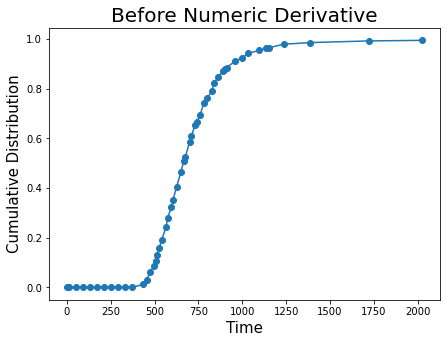

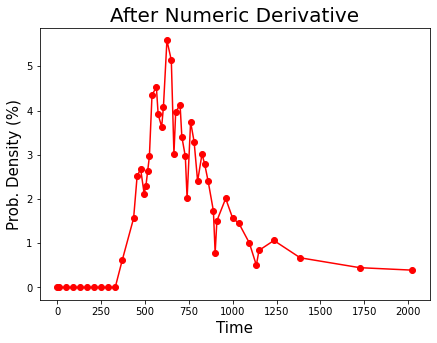

In [13]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot (1,1,1)
ax.set_title ('Before Numeric Derivative', fontsize = 20)
ax.set_xlabel ('Time', fontsize = 15)
ax.set_ylabel ('Cumulative Distribution', fontsize = 15)

ax.plot(df['Time'][:-2], df['Cumulative Distribution'][:-2], '-o')

fig_2 = plt.figure(figsize = (7,5))
ax_2 = fig_2.add_subplot (1,1,1)
ax_2.set_title ('After Numeric Derivative', fontsize = 20)
ax_2.set_xlabel ('Time', fontsize = 15)
ax_2.set_ylabel ('Prob. Density (%)', fontsize = 15)

ax_2.plot(df['Time'][:-2], df['Prob. Density (%)'][:-2], '-o', color='red')



In [14]:
#ANSWER: The 1st place has a probability of  0.614525%; 2nd: 1.564246%; 3rd: 2.513966%. For any 
#        individula runner see Table (df)
#        Last place has a probability of 0.279329%

# ####################################################

# EXERCISE 3

# --> PART a) (# of clusters)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [19]:
coor = pd.read_csv("C:\\Users\\gerar\\Desktop\\2022\\HOMEWORK\\data\\coordinates.csv",
                    names = ["Time", "x", "y", "z"])
coor.head()
#coor.describe()

,Time,x,y,z
0,10.10,-1.310,-0.152,-8.99
1,-4.39,-0.329,8.400,-9.86
2,-2.97,-11.100,-4.010,9.66
3,8.33,0.454,0.163,-8.73
4,-4.32,1.780,4.350,7.67


In [20]:
#K-means is applied as seen in Data From Scratch book (Chapter 19)
sqr = []
for i in range (1,12):
    kmeans = KMeans(n_clusters=i, max_iter=800)
    kmeans.fit(coor)
    sqr.append(kmeans.inertia_)

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\gerar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

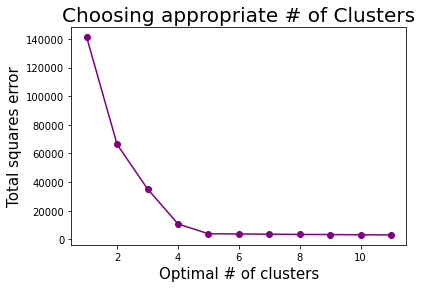

In [21]:
plt.plot(range(1,12),sqr, '-o' ,color = 'purple')
plt.title("Choosing appropriate # of Clusters", fontsize = 20)
plt.xlabel("Optimal # of clusters", fontsize = 15)
plt.ylabel('Total squares error', fontsize = 15)
plt.show()

In [22]:
#ANSWER: OPTIMAL NUMBER OF CLUSTERS IS 4 

# -->PART b) Portion of Variance in 1st Component

In [23]:
#Normalization of values
coor_norm = (coor-coor.min())/(coor.max()-coor.min()) 
coor_norm.describe()

,Time,x,y,z
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.372781,0.559023,0.468505,0.509332
std,0.255128,0.243496,0.245288,0.327849
min,0.000000,0.000000,0.000000,0.000000
25%,0.210643,0.509264,0.289288,0.134188
50%,0.286345,0.594535,0.411365,0.693803
75%,0.395683,0.681628,0.617591,0.789850
max,1.000000,1.000000,1.000000,1.000000


In [24]:
#Obtaining the two components
from sklearn.decomposition import PCA #funcion import
pca = PCA(n_components=2)  #2 components
pca_coor = pca.fit_transform(coor_norm) #here I obtain Principal components
pca_coor_df = pd.DataFrame (data = pca_coor, columns = ['Component_1', 'Component_2']) #data frame da valores
print (pca_coor_df)

     Component_1  Component_2
0      -0.422247     0.468036
1      -0.497660    -0.202968
2       0.592671     0.320950
3      -0.421032     0.363308
4       0.188870    -0.232034
..           ...          ...
995     0.246747    -0.325508
996     0.306637    -0.364111
997     0.217527    -0.257157
998    -0.481331     0.301773
999     0.181956    -0.308781

[1000 rows x 2 columns]


In [25]:
var = pca.explained_variance_ratio_
print (var,   '--> Variance of 1st (left) and 2nd component (right)') 

[0.51906361 0.28601733] --> Variance of 1st (left) and 2nd component (right)


In [26]:
#ANSWER: VARIANCE OF FIRST COMPONENT IS 0.51906361

# -->PART c) Run Algorithm on PCA data

In [27]:
#CHOSEN ALGORITHM : K-MEANS

In [28]:
clustering=KMeans(n_clusters = 4, max_iter = 600) #4 clusters based on a) 
clustering.fit(coor_norm)# model is applied

C:\Users\gerar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(max_iter=600, n_clusters=4)

In [29]:
#Here we see how each set of data corresponds to a cluster. Clusters range from 0 to 3
coor['KMeans_Clusters']=clustering.labels_
coor.head()

,Time,x,y,z,KMeans_Clusters
0,10.10,-1.310,-0.152,-8.99,1
1,-4.39,-0.329,8.400,-9.86,2
2,-2.97,-11.100,-4.010,9.66,3
3,8.33,0.454,0.163,-8.73,1
4,-4.32,1.780,4.350,7.67,0


In [30]:
#Everything in put together into a single table. 
pca_coor_df = pd.DataFrame (data = pca_coor, columns = ['Component_1', 'Component_2']) #data frame da valores
pca_new_coor = pd.concat([pca_coor_df, coor[['KMeans_Clusters']]], axis=1)#se anade el k means
pca_new_coor


,Component_1,Component_2,KMeans_Clusters
0,-0.422247,0.468036,1
1,-0.497660,-0.202968,2
2,0.592671,0.320950,3
3,-0.421032,0.363308,1
4,0.188870,-0.232034,0
...,...,...,...
995,0.246747,-0.325508,0
996,0.306637,-0.364111,0
997,0.217527,-0.257157,0
998,-0.481331,0.301773,1


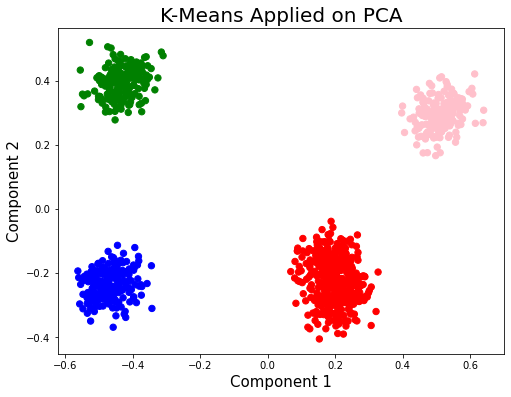

In [31]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot (1,1,1)
ax.set_xlabel ('Component 1', fontsize = 15)
ax.set_ylabel ('Component 2', fontsize = 15)
ax.set_title ('K-Means Applied on PCA', fontsize = 20)
color_theme = np.array(["red", "green","blue","pink"])
ax.scatter (x = pca_new_coor.Component_1, y=pca_new_coor.Component_2, 
             c=color_theme[pca_new_coor.KMeans_Clusters], s=40)

plt.show()

In [32]:
#ANSWER: FOUR CLUSTERS ARE FOUND

# EXERCISE 4

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#We read the data 
df = pd.read_csv("C:\\Users\\gerar\\Desktop\\2022\\HOMEWORK\\data\\Car dataset from Kaggle.csv", 
           engine = 'python')

In [39]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [43]:
#From matrix only 3 columns are used: year = X1;	km_driven X2;	selling_price = Y
dataset = df.values
X1 = dataset [:,1:4]
Y = dataset [:,2]

gd = np.array(X1)
gd_del = np.delete(gd, 1, 1) #erase column

x_n = np.asarray(gd_del).astype('float32')
y_n = np.asarray(Y).astype('float32')

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [11]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),  #60
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),                 #60
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mse','mae'])
  return model

In [12]:
# Run of model for 10 Epochs
model10 = build_model()
model10.fit(x_n,y_n,epochs=10,verbose=1)

NameError: name 'keras' is not defined

In [ ]:
# Run of model for 100 Epochs
model100 = build_model()
model100.fit(x_n,y_n,epochs=100,verbose=1)

In [ ]:
# Run of model for 1000 Epochs
#NOTE: This line of code takes several minutes
model1000 = build_model()
model1000.fit(x_n,y_n,epochs=1000,verbose=1)

In [ ]:
test_10 = model10.predict(x_n).flatten()
test_100 = model100.predict(x_n).flatten()
test_1000 = model1000.predict(x_n).flatten()

In [ ]:
from sklearn.metrics import r2_score

rcu_10 = r2_score(y_n,test_10)
rcu_100 = r2_score(y_n,test_100)
rcu_1000 = r2_score(y_n,test_1000)

print (rcu_10,   '--> Value obtained with 10 Epochs') 
print (rcu_100,  '--> Value obtained with 100 Epochs') 
print (rcu_1000,  '--> Value obtained with 1000 Epochs')

In [ ]:
#ANSWER: The R^2 with linear regresion was of  0.1749. Therefore by using 10 epochs 
#        there is no improvement. By using 100 there is improvement and certainly
#        by using 1000 there is also improvement, however, is not as big or good to be able
#        to predict prices (or new values).